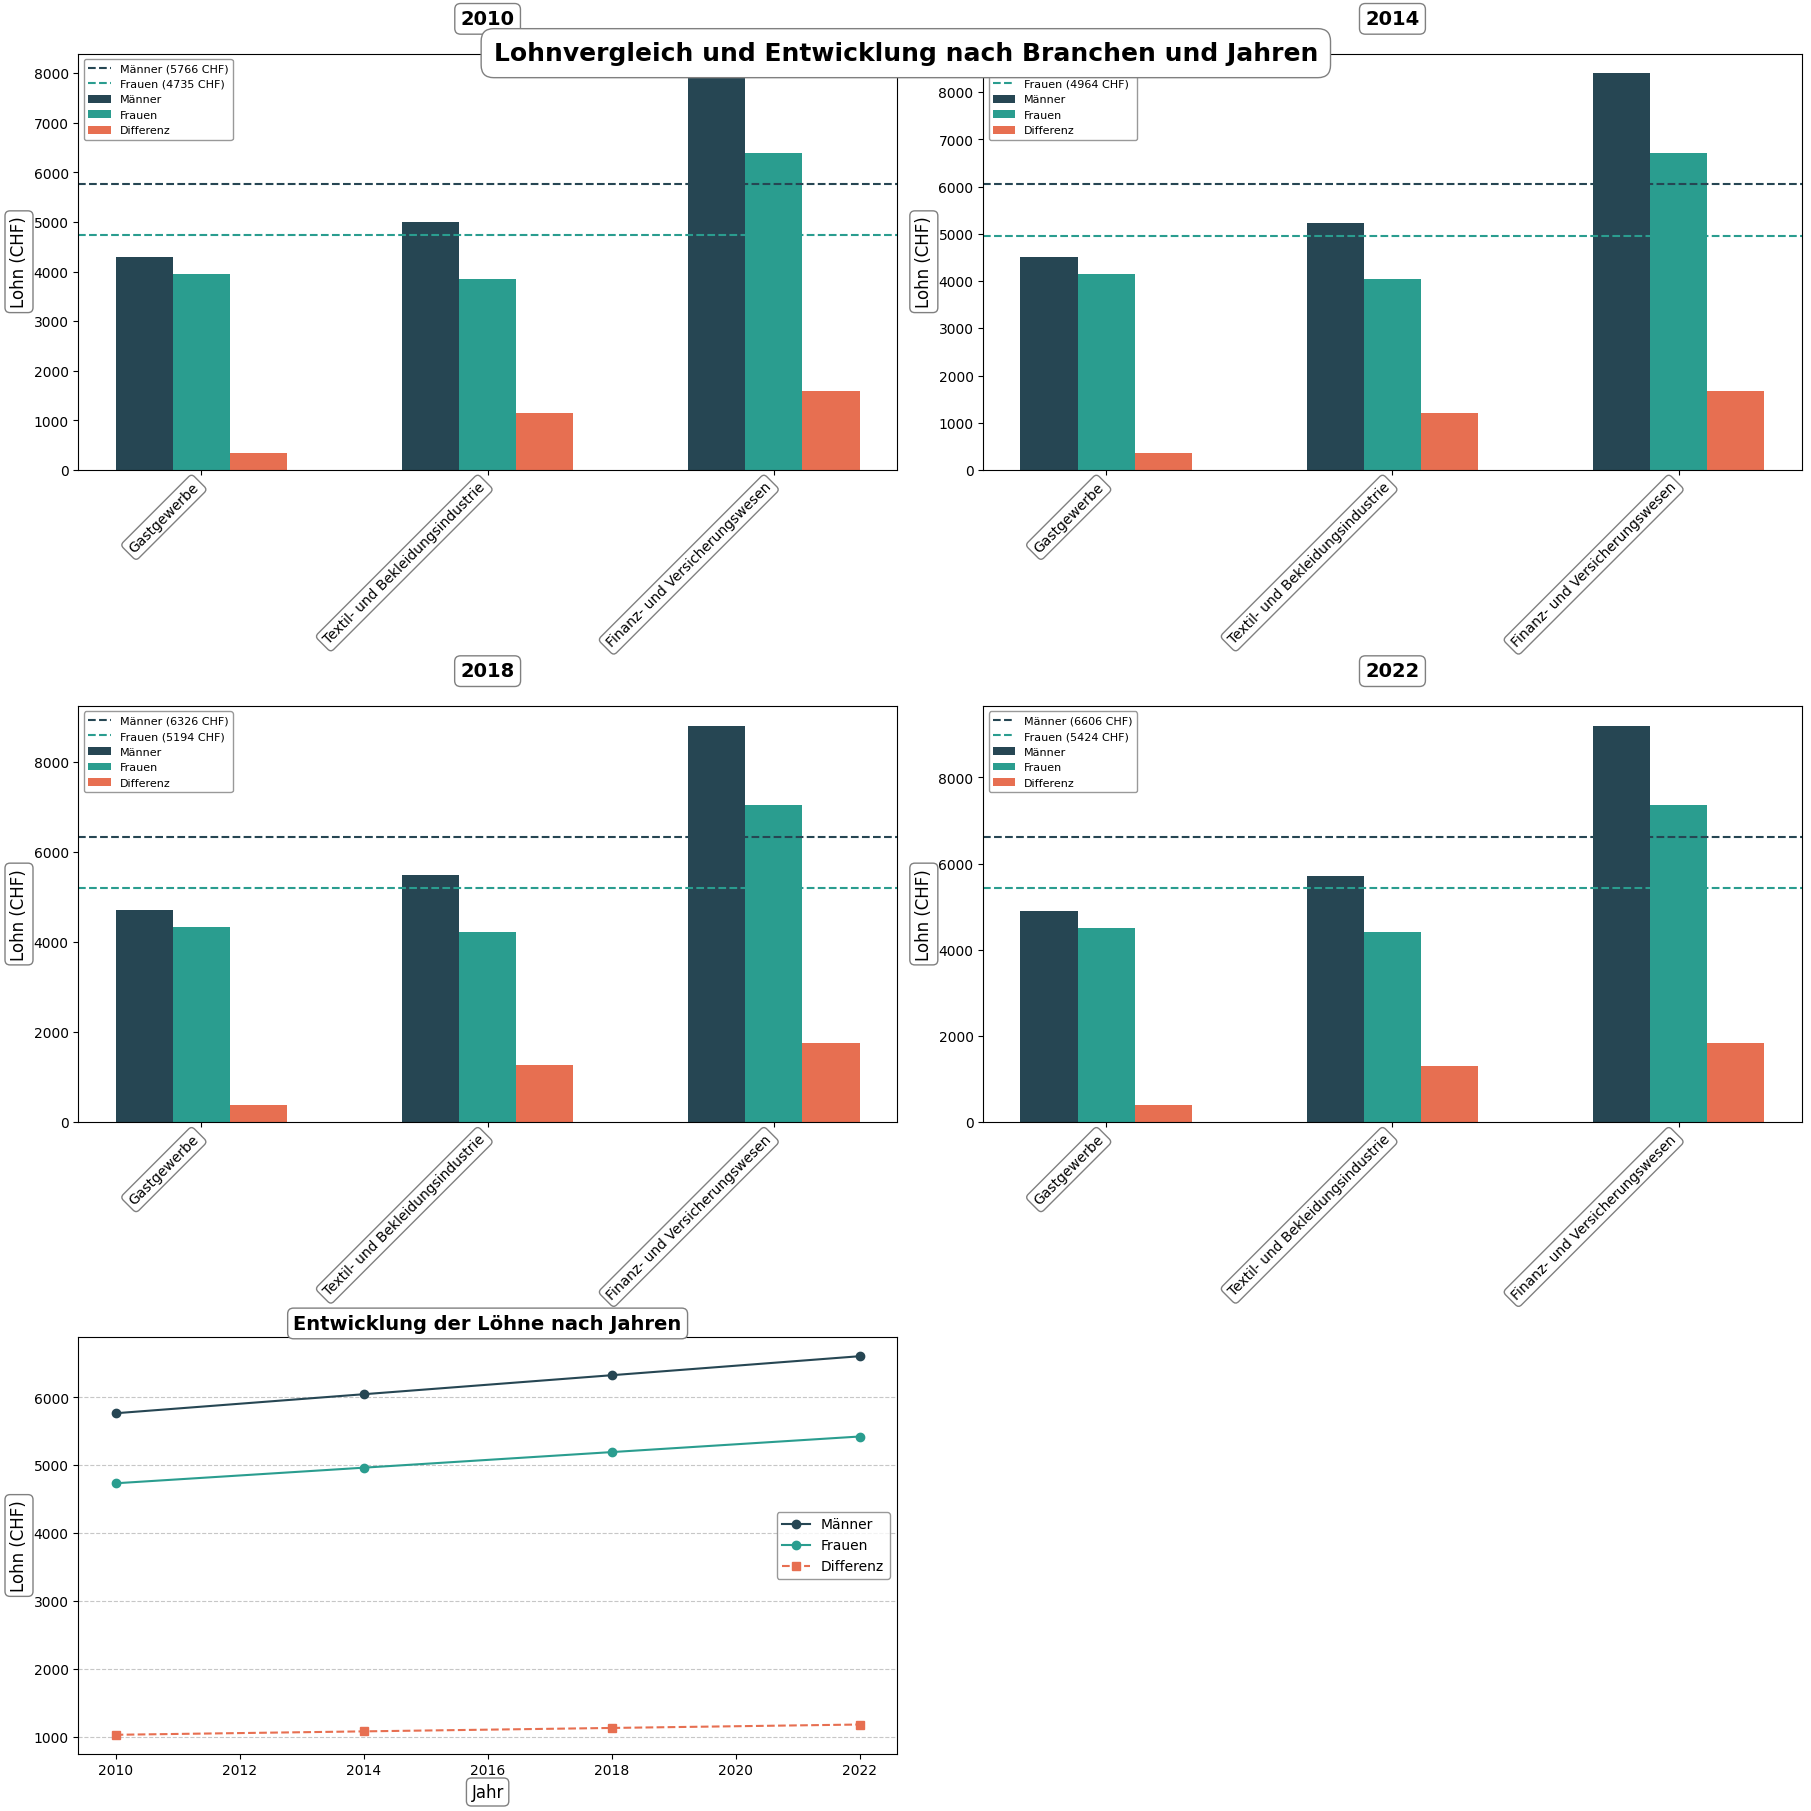

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18), constrained_layout=True)
axes = axes.flatten()

for ax, (year, group) in zip(axes[:4], grouped_data):
    x = range(len(group))
    bar_width = 0.2  # Breite der Balken


    ax.bar(x, group["Durchschnittslohn_Männer (CHF)"], width=bar_width, label="Männer", color=custom_colors[0])
    ax.bar([p + bar_width for p in x], group["Durchschnittslohn_Frauen (CHF)"], width=bar_width, label="Frauen", color=custom_colors[1])
    ax.bar(
        [p + 2 * bar_width for p in x],
        group["Lohnunterschied_Absolut (CHF)"],
        width=bar_width,
        label="Differenz",
        color=custom_colors[2],
    )

    # Durchschnittslinien hinzufügen
    avg_men = Jahresdurchschnitt.loc[year, "Durchschnittslohn_Männer (CHF)"]
    avg_women = Jahresdurchschnitt.loc[year, "Durchschnittslohn_Frauen (CHF)"]
    ax.axhline(y=avg_men, color=custom_colors[0], linestyle="--", label=f"Männer ({int(avg_men)} CHF)")
    ax.axhline(y=avg_women, color=custom_colors[1], linestyle="--", label=f"Frauen ({int(avg_women)} CHF)")

    ax.set_xticks([p + bar_width for p in x])
    ax.set_xticklabels(
        group["Branche"],
        rotation=45,
        ha="right",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"),
    )
    ax.set_title(
        f"{year}", 
        fontsize=14, 
        fontweight="bold", 
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"), 
        y=1.05 
    )
    ax.set_ylabel("Lohn (CHF)", fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"))
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=8, loc="upper left", frameon=True, fancybox=True, edgecolor="gray", facecolor="white")

ax_line = axes[4]
ax_line.plot(
    line_data.index, 
    line_data["Durchschnittslohn_Männer (CHF)"], 
    label="Männer", 
    color=custom_colors[0], 
    linestyle="-", 
    marker="o"
)
ax_line.plot(
    line_data.index, 
    line_data["Durchschnittslohn_Frauen (CHF)"], 
    label="Frauen", 
    color=custom_colors[1], 
    linestyle="-", 
    marker="o"
)
ax_line.plot(
    line_data.index, 
    line_data["Lohnunterschied_Absolut (CHF)"], 
    label="Differenz", 
    color=custom_colors[2], 
    linestyle="--", 
    marker="s"
)
ax_line.set_title("Entwicklung der Löhne nach Jahren", fontsize=14, fontweight="bold", bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"))
ax_line.set_xlabel("Jahr", fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"))
ax_line.set_ylabel("Lohn (CHF)", fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"))
ax_line.tick_params(axis='y', labelsize=10)
ax_line.legend(fontsize=10, frameon=True, fancybox=True, edgecolor="gray", facecolor="white")
ax_line.grid(axis="y", linestyle="--", alpha=0.7)

fig.delaxes(axes[5])

plt.suptitle("Lohnvergleich und Entwicklung nach Branchen und Jahren", fontsize=18, fontweight="bold", bbox=dict(boxstyle="round,pad=0.5", edgecolor="gray", facecolor="white"), y=0.98)
plt.show()
